In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel, SelectKBest, mutual_info_regression
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# test update

In [453]:
df = pd.read_csv('medical_insurance.csv')
df.columns


Index(['person_id', 'age', 'sex', 'region', 'urban_rural', 'income',
       'education', 'marital_status', 'employment_status', 'household_size',
       'dependents', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year',
       'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
       'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c',
       'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years',
       'policy_changes_last_2yrs', 'provider_quality', 'risk_score',
       'annual_medical_cost', 'annual_premium', 'monthly_premium',
       'claims_count', 'avg_claim_amount', 'total_claims_paid',
       'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd',
       'cardiovascular_disease', 'cancer_history', 'kidney_disease',
       'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count',
       'proc_surgery_count', 'proc_physio_count', 'proc_consult_count',
       'proc_lab_count', 'is_high_risk', 'had_major_procedure'],
      

In [454]:
# stats
df.info(verbose=True)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  int64  
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  object 
 13  

,person_id,age,income,household_size,dependents,bmi,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,50000.500000,47.521500,4.987390e+04,2.430900,0.898380,26.990512,1.92765,0.093640,0.373350,1.236320,...,0.014770,0.108310,0.130140,0.508530,0.158690,0.508390,0.50933,0.509140,0.367810,0.169700
std,28867.657797,15.988752,4.680021e+04,1.075126,0.950654,4.994883,1.73773,0.304848,1.373011,1.209358,...,0.120632,0.310773,0.336459,0.749755,0.463562,0.747218,0.75363,0.750455,0.482212,0.375371
min,1.000000,0.000000,1.100000e+03,1.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25000.750000,37.000000,2.110000e+04,2.000000,0.000000,23.600000,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,50000.500000,48.000000,3.620000e+04,2.000000,1.000000,27.000000,2.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,75000.250000,58.000000,6.220000e+04,3.000000,1.000000,30.400000,3.00000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000
max,100000.000000,100.000000,1.061800e+06,9.000000,7.000000,50.400000,25.00000,3.000000,21.000000,11.000000,...,1.000000,1.000000,1.000000,7.000000,6.000000,7.000000,7.00000,7.000000,1.000000,1.000000


In [455]:
# basic check for demographic columns
demographic_cols = df.columns[1:12]

for col in demographic_cols:
    null_val = df[col].isna().sum()
    zero_count = df[col].eq(0).sum()

    # print(f"Total null values in '{col}': {null_val}")
    print(f"Total zero values in '{col}': {zero_count}")

# drop values in age = 0
df.drop(df[df['age'] == 0].index, inplace=True)

print(df['age'].eq(0).sum())

Total zero values in 'age': 165
Total zero values in 'sex': 0
Total zero values in 'region': 0
Total zero values in 'urban_rural': 0
Total zero values in 'income': 0
Total zero values in 'education': 0
Total zero values in 'marital_status': 0
Total zero values in 'employment_status': 0
Total zero values in 'household_size': 0
Total zero values in 'dependents': 40836
Total zero values in 'bmi': 0
0


In [456]:
print("Unique values for categorical cols")
for col in df.columns:
    if df[col].dtype == object:
        print(f"{col}: {df[col].unique()}")

Unique values for categorical cols
sex: ['Female' 'Male' 'Other']
region: ['North' 'Central' 'West' 'South' 'East']
urban_rural: ['Suburban' 'Urban' 'Rural']
education: ['Doctorate' 'No HS' 'HS' 'Some College' 'Masters' 'Bachelors']
marital_status: ['Married' 'Single' 'Divorced' 'Widowed']
employment_status: ['Retired' 'Employed' 'Self-employed' 'Unemployed']


smoker: ['Never' 'Current' 'Former']
alcohol_freq: [nan 'Weekly' 'Daily' 'Occasional']
plan_type: ['PPO' 'POS' 'HMO' 'EPO']
network_tier: ['Bronze' 'Gold' 'Platinum' 'Silver']


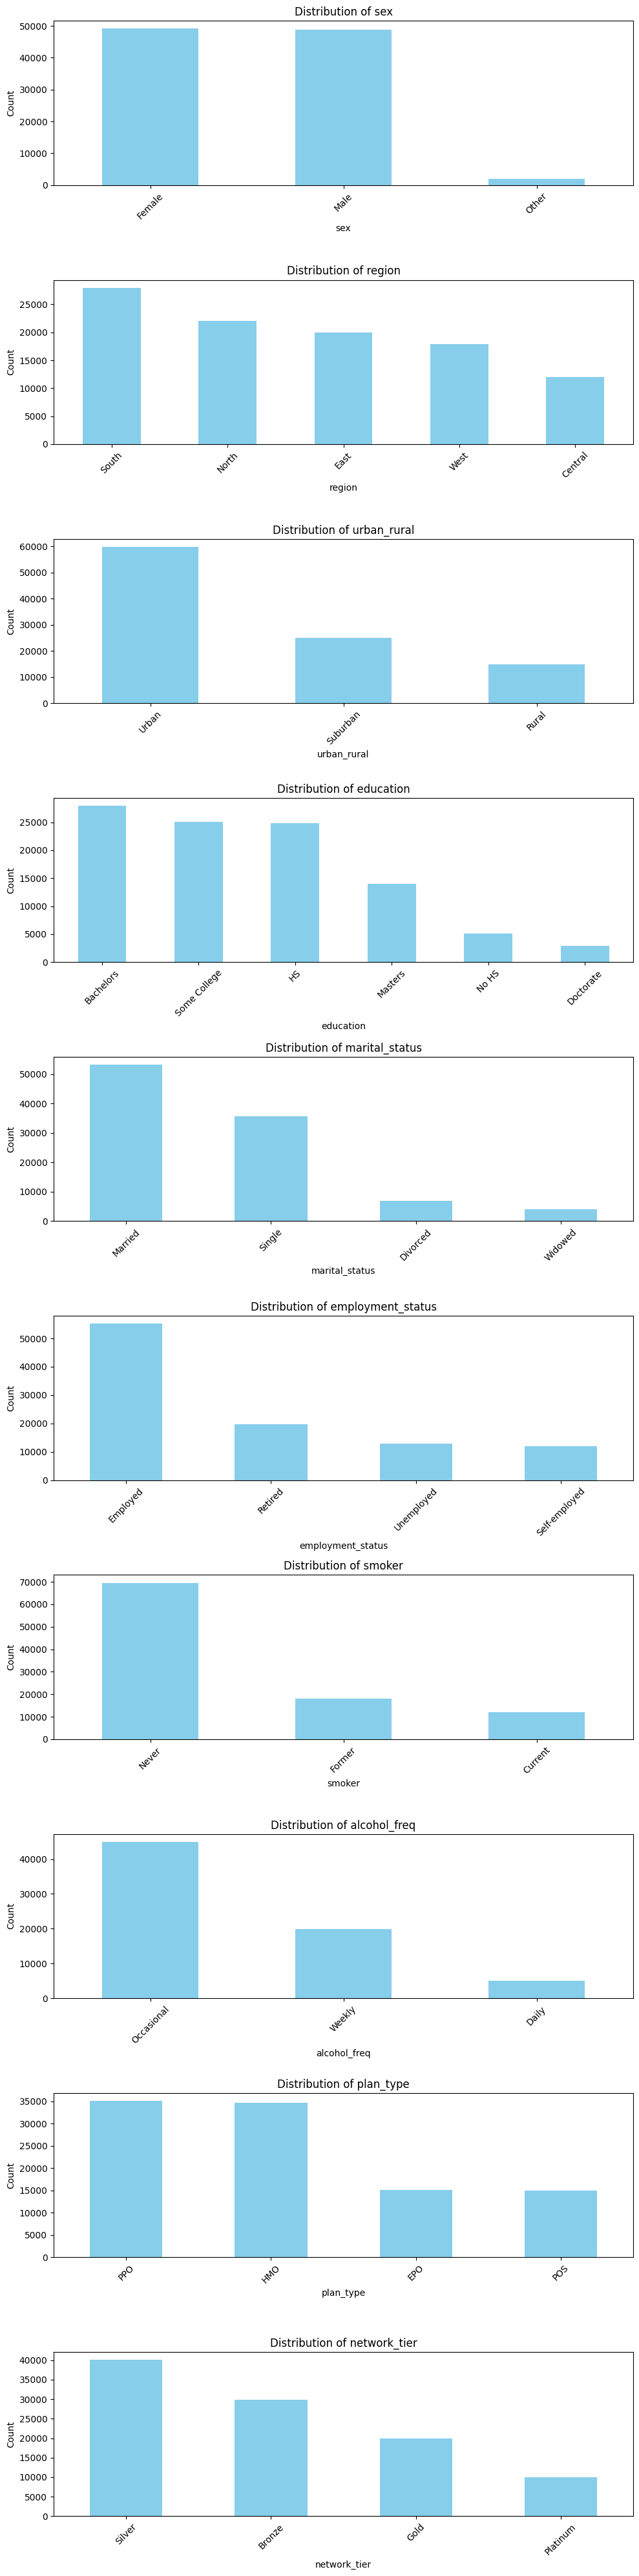

In [457]:
categorical_cols = df.select_dtypes(include='object').columns

fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, 4 * len(categorical_cols)))

# plot distribution for each categorical column
for idx, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[idx], color='skyblue')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [458]:
# drop 'Other' age
df.drop(df[df['age'] == 'Other'].index, inplace=True)
df.count()

person_id                      99835
age                            99835
sex                            99835
region                         99835
urban_rural                    99835
income                         99835
education                      99835
marital_status                 99835
employment_status              99835
household_size                 99835
dependents                     99835
bmi                            99835
smoker                         99835
alcohol_freq                   69798
visits_last_year               99835
hospitalizations_last_3yrs     99835
days_hospitalized_last_3yrs    99835
medication_count               99835
systolic_bp                    99835
diastolic_bp                   99835
ldl                            99835
hba1c                          99835
plan_type                      99835
network_tier                   99835
deductible                     99835
copay                          99835
policy_term_years              99835
p

Feature Engineering

In [459]:
# Features = lifestyle_risk_score, is_high_bp, health_risk_index, healthcare_visit_frequency, medication_load
def engineer_health_features(df):
    df = df.copy()

    # age_group
    df["age_group"] = pd.cut(
        df["age"],
        bins=[0, 25, 40, 55, 65, 120],
        labels=["young", "adult", "mid_age", "senior", "elderly"]
    )
    
    # lifestyle_risk_score
    df["lifestyle_risk_score"] = (
        (df["smoker"] == "yes").astype(int) +
        (df["alcohol_freq"].isin(["daily", "weekly"])).astype(int) +
        (df["bmi"] > 30).astype(int)
    )
    
    # is_high_bp
    df["is_high_bp"] = (
        (df["systolic_bp"] >= 140) | 
        (df["diastolic_bp"] >= 90)
    ).astype(int)

    # health_risk_index
    df["health_risk_index"] = (
        (df["bmi"] > 30).astype(int) +
        df["is_high_bp"] +
        (df["ldl"] > 160).astype(int) +
        (df["hba1c"] >= 6.5).astype(int)
    )
    
    # healthcare_visit_frequency
    utilization_cols = [
        "visits_last_year",
        "hospitalizations_last_3yrs",
        "proc_consult_count",
        "proc_lab_count",
        "proc_imaging_count",
        "proc_surgery_count",
        "proc_physio_count"
    ]
    df["healthcare_visit_frequency"] = df[utilization_cols].sum(axis=1)

    # medication_load
    df['medication_load'] = np.log1p(df["medication_count"])


    return df


In [460]:
df = engineer_health_features(df)

df[['age_group', 'lifestyle_risk_score', 'is_high_bp', 'health_risk_index', 'healthcare_visit_frequency', 'medication_load']].head(10)

,age_group,lifestyle_risk_score,is_high_bp,health_risk_index,healthcare_visit_frequency,medication_load
0,mid_age,0,0,0,6,1.609438
1,elderly,0,0,0,4,1.386294
2,elderly,1,1,2,5,1.609438
3,young,1,0,3,2,0.693147
4,mid_age,1,0,2,7,1.098612
5,senior,0,1,1,2,1.098612
6,adult,0,0,0,3,0.000000
7,young,1,0,3,7,0.693147
8,mid_age,0,0,0,2,0.000000
9,adult,1,0,1,2,0.000000


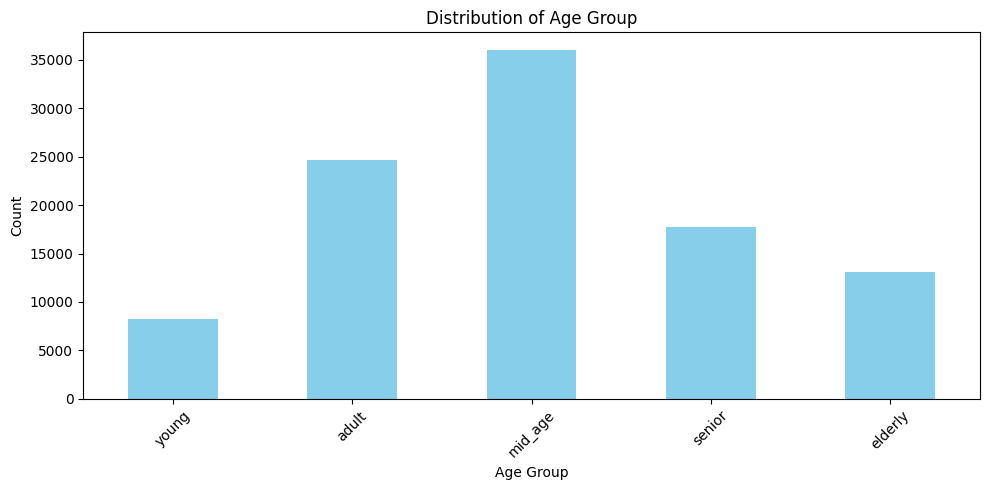

In [461]:
df['age_group'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Distribution of Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [462]:
# encode categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"All categorical columns: {categorical_cols}")

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

All categorical columns: Index(['sex', 'region', 'urban_rural', 'education', 'marital_status',
       'employment_status', 'smoker', 'alcohol_freq', 'plan_type',
       'network_tier', 'age_group'],
      dtype='object')


Feature Selection

In [463]:
# # remove columns to prevent leakage
# leakage_columns = [
#     'person_id',
#     # ===== TEMPORAL LEAKAGE - These happen AFTER premium is set =====
#     'annual_premium',      # Actual costs incurred
#     'monthly_premium',          # Derived from annual_premium
#     'claims_count',             # Claims filed during the year
#     'avg_claim_amount',         # Average claim value
#     'total_claims_paid',        # Total paid by insurance
    
#     # ===== POLICY FEATURES - These are SET with the premium =====
#     'deductible',               # Determined when premium is set
#     'copay',                    # Determined when premium is set
#     'plan_type',                # Different plans have different premiums
#     'network_tier',             # Affects premium directly
#     'policy_term_years',        # Affects premium calculation
#     'policy_changes_last_2yrs', # May affect current premium
    
#     # ===== CALCULATED RISK SCORES =====
#     'provider_quality',         # May be used in premium calculation
#     'risk_score'                # Likely used to set the premium!
# ]

# print(f"\nColumns to remove: {leakage_columns}")

# columns_to_drop = [col for col in leakage_columns if col in df.columns]
# print(f"Columns found in dataframe: {columns_to_drop}")

# # Drop the columns
# if columns_to_drop:
#     df.drop(columns=columns_to_drop, inplace=True)
#     print(f"Dropped {len(columns_to_drop)} columns")
# else:
#     print("No leakage columns found in dataframe")

# print(f"\nRemaining columns: {df.columns.tolist()}")

In [464]:
# selected_features_expanded = [
#     'smoker', 'age', 'bmi', 'chronic_count',
#     'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
#     'is_high_risk', 'hba1c', 'proc_surgery_count',
#     'cardiovascular_disease', 'income', 'region',
#     'systolic_bp', 'diabetes', 'medication_count',
#     'visits_last_year', 'sex', 'urban_rural'
# ]

# selected_features = selected_features_expanded + [
#     'age_group', 'lifestyle_risk_score', 'is_high_bp',
#     'health_risk_index', 'healthcare_visit_frequency', 'medication_load'
# ]

target = 'annual_medical_cost'

X = df.drop(columns=['person_id', target])
y = df[target]

In [465]:
# ============================================================
# FEATURE ENGINEERING: Create Interaction Terms
# ============================================================
print(f"\n{'='*60}")
print("FEATURE ENGINEERING: CREATING INTERACTIONS")
print(f"{'='*60}")

# Create important interaction features
if 'smoker' in X.columns and 'age' in X.columns:
    X['smoker_age_interaction'] = X['smoker'] * X['age']
    print("✓ Created: smoker × age")

if 'smoker' in X.columns and 'bmi' in X.columns:
    X['smoker_bmi_interaction'] = X['smoker'] * X['bmi']
    print("✓ Created: smoker × bmi")

if 'age' in X.columns and 'chronic_count' in X.columns:
    X['age_chronic_interaction'] = X['age'] * X['chronic_count']
    print("✓ Created: age × chronic_count")

if 'bmi' in X.columns and 'chronic_count' in X.columns:
    X['bmi_chronic_interaction'] = X['bmi'] * X['chronic_count']
    print("✓ Created: bmi × chronic_count")

# Create polynomial features for key predictors
if 'age' in X.columns:
    X['age_squared'] = X['age'] ** 2
    print("✓ Created: age²")

if 'bmi' in X.columns:
    X['bmi_squared'] = X['bmi'] ** 2
    print("✓ Created: bmi²")

# ============================================================
# TARGET TRANSFORMATION: Log Transform
# ============================================================
print(f"\n{'='*60}")
print("TARGET TRANSFORMATION")
print(f"{'='*60}")

# Check if target has positive values
if (y > 0).all():
    y_log = np.log(y)
    print("✓ Applied log transformation to target variable")
    print(f"  Original range: ${y.min():.2f} - ${y.max():.2f}")
    print(f"  Log range: {y_log.min():.4f} - {y_log.max():.4f}")
    
    # Use log-transformed target
    y_transformed = y_log
    use_log_transform = True
else:
    print("⚠ Target has non-positive values, skipping log transform")
    y_transformed = y
    use_log_transform = False

print(f"\nFeatures shape (with engineered features): {X.shape}")
print(f"Target shape: {y_transformed.shape}")
print(f"\nChecking for missing values:")
missing = X.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("✓ No missing values!")

# Check target distribution
print(f"\nTransformed target statistics:")
print(y_transformed.describe())

# -------------------------------------------
# 1) TRAIN TEST SPLIT
# -------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_transformed, test_size=0.2, random_state=42
)

# -------------------------------------------
# 2) Identify categorical + numerical columns BASED ON X (not df)
# -------------------------------------------
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

# Remove target leakage columns if any
for col in ['person_id', target]:
    if col in categorical_features: categorical_features.remove(col)
    if col in numerical_features: numerical_features.remove(col)

# -------------------------------------------
# 3) One-hot encode ONLY categorical columns
# -------------------------------------------
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_test_encoded  = pd.get_dummies(X_test,  columns=categorical_features, drop_first=True)

# Align columns (important)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# -------------------------------------------
# 4) Identify numerical columns AFTER encoding
# -------------------------------------------
encoded_numerical_cols = [
    col for col in X_train_encoded.columns
    if np.issubdtype(X_train_encoded[col].dtype, np.number)
]

# Scale only ORIGINAL numerical features + engineered numeric features
# (NOT dummy/one-hot columns)
cols_to_scale = [col for col in encoded_numerical_cols if col in numerical_features or "interaction" in col or "squared" in col]

# -------------------------------------------
# 5) Apply MinMaxScaler correctly
# -------------------------------------------
scaler = MinMaxScaler()

X_train_encoded[cols_to_scale] = scaler.fit_transform(X_train_encoded[cols_to_scale])
X_test_encoded[cols_to_scale]  = scaler.transform(X_test_encoded[cols_to_scale])

# Final cleaned datasets
X_train = X_train_encoded
X_test = X_test_encoded

X_train.head()


FEATURE ENGINEERING: CREATING INTERACTIONS
✓ Created: smoker × age
✓ Created: smoker × bmi
✓ Created: age × chronic_count
✓ Created: bmi × chronic_count
✓ Created: age²
✓ Created: bmi²

TARGET TRANSFORMATION
✓ Applied log transformation to target variable
  Original range: $55.55 - $65724.90
  Log range: 4.0173 - 11.0932

Features shape (with engineered features): (99835, 64)
Target shape: (99835,)

Checking for missing values:
✓ No missing values!

Transformed target statistics:
count    99835.000000
mean         7.645267
std          0.851690
min          4.017284
25%          7.069759
50%          7.641819
75%          8.218646
max         11.093233
Name: annual_medical_cost, dtype: float64


,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,dependents,...,is_high_bp,health_risk_index,healthcare_visit_frequency,medication_load,smoker_age_interaction,smoker_bmi_interaction,age_chronic_interaction,bmi_chronic_interaction,age_squared,bmi_squared
8315,0.787879,0.0,0.00,1.0,0.038225,0.6,0.666667,0.000000,0.125,0.142857,...,1.0,0.50,0.413793,0.557886,0.790,0.283730,0.5925,0.249419,0.624062,0.025245
47570,0.555556,0.5,1.00,0.5,0.037348,0.8,0.333333,0.000000,0.375,0.285714,...,0.0,0.25,0.068966,0.278943,0.560,0.686508,0.2800,0.402326,0.313531,0.439520
96584,0.535354,0.0,0.25,0.0,0.083845,0.6,0.666667,0.666667,0.000,0.000000,...,0.0,0.00,0.206897,0.442114,0.540,0.531746,0.1350,0.155814,0.291529,0.239650
55061,0.515152,0.0,1.00,1.0,0.161549,1.0,0.333333,0.000000,0.250,0.142857,...,0.0,0.00,0.172414,0.000000,0.520,0.498016,0.1300,0.145930,0.270327,0.202829
65586,0.727273,0.5,0.00,1.0,0.110791,1.0,0.000000,0.000000,0.000,0.000000,...,0.0,0.00,0.137931,0.647685,0.365,0.293651,0.1825,0.172093,0.532853,0.305556


## Modelling

In [466]:
# ============================================================
# PART C: MODEL DEVELOPMENT (3 REGRESSION MODELS)
# ============================================================
print("\n" + "="*60)
print("PART C: TRAINING REGRESSION MODELS")
print("="*60)

# Dictionary to store models (with better hyperparameters)
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=10.0, random_state=42),  # Increased regularization
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=15, min_samples_split=20, random_state=42)  # More flexibility
}

# Dictionary to store results
results = {}

# Train each model
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    
    # Use scaled data for Linear and Ridge, original for Decision Tree
    if name == 'Decision Tree Regressor':
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
    
    # If we used log transform, convert predictions back to original scale
    if use_log_transform:
        y_pred_train_original = np.exp(y_pred_train)
        y_pred_test_original = np.exp(y_pred_test)
        y_train_original = np.exp(y_train)
        y_test_original = np.exp(y_test)
    else:
        y_pred_train_original = y_pred_train
        y_pred_test_original = y_pred_test
        y_train_original = y_train
        y_test_original = y_test
    
    # Store predictions (both transformed and original scale)
    results[name] = {
        'model': model,
        'y_pred_train': y_pred_train,
        'y_pred_test': y_pred_test,
        'y_pred_train_original': y_pred_train_original,
        'y_pred_test_original': y_pred_test_original,
        'y_train_original': y_train_original,
        'y_test_original': y_test_original
    }
    
    print(f"✓ {name} trained successfully")

# ============================================================
# PART D: PERFORMANCE MEASUREMENT
# ============================================================
print("\n" + "="*60)
print("PART D: PERFORMANCE EVALUATION")
print("="*60)

# Function to calculate all metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# Calculate metrics for all models
performance_summary = []

for name in models.keys():
    print(f"\n{'='*60}")
    print(f"{name}")
    print(f"{'='*60}")
    
    # Use original scale for interpretability
    y_train_eval = results[name]['y_train_original']
    y_test_eval = results[name]['y_test_original']
    y_pred_train_eval = results[name]['y_pred_train_original']
    y_pred_test_eval = results[name]['y_pred_test_original']
    
    # Training metrics
    train_metrics = calculate_metrics(y_train_eval, y_pred_train_eval)
    print("\nTraining Set Performance:")
    for metric, value in train_metrics.items():
        print(f"  {metric}: {value:,.4f}")
    
    # Test metrics
    test_metrics = calculate_metrics(y_test_eval, y_pred_test_eval)
    print("\nTest Set Performance:")
    for metric, value in test_metrics.items():
        print(f"  {metric}: {value:,.4f}")
    
    # Calculate overfitting indicator
    overfit_score = train_metrics['R2'] - test_metrics['R2']
    print(f"\nOverfitting Indicator (Train R2 - Test R2): {overfit_score:.4f}")
    
    # Store for comparison
    performance_summary.append({
        'Model': name,
        'Train_MAE': train_metrics['MAE'],
        'Test_MAE': test_metrics['MAE'],
        'Train_RMSE': train_metrics['RMSE'],
        'Test_RMSE': test_metrics['RMSE'],
        'Train_R2': train_metrics['R2'],
        'Test_R2': test_metrics['R2'],
        'Overfitting': overfit_score
    })

# Create performance comparison DataFrame
perf_df = pd.DataFrame(performance_summary)
print("\n" + "="*60)
print("PERFORMANCE COMPARISON SUMMARY")
print("="*60)
print(perf_df.to_string(index=False))


PART C: TRAINING REGRESSION MODELS

--- Training Linear Regression ---
✓ Linear Regression trained successfully

--- Training Ridge Regression ---
✓ Ridge Regression trained successfully

--- Training Decision Tree Regressor ---
✓ Decision Tree Regressor trained successfully

PART D: PERFORMANCE EVALUATION

Linear Regression

Training Set Performance:
  MAE: 95,700.7984
  MSE: 259,798,180,755,118.2812
  RMSE: 16,118,256.1326
  R2: -26,851,772.6556

Test Set Performance:
  MAE: 179,181.2543
  MSE: 412,053,671,728,352.0625
  RMSE: 20,299,105.1953
  R2: -40,251,868.7939

Overfitting Indicator (Train R2 - Test R2): 13400096.1384

Ridge Regression

Training Set Performance:
  MAE: 83,698.9463
  MSE: 282,890,251,694,562.9375
  RMSE: 16,819,341.5952
  R2: -29,238,483.2180

Test Set Performance:
  MAE: 172,983.0805
  MSE: 468,917,993,292,309.0625
  RMSE: 21,654,514.3860
  R2: -45,806,716.1950

Overfitting Indicator (Train R2 - Test R2): 16568232.9770

Decision Tree Regressor

Training Set Per

R2 Score: 0.1670
Mean Squared Error: 8154755.5919


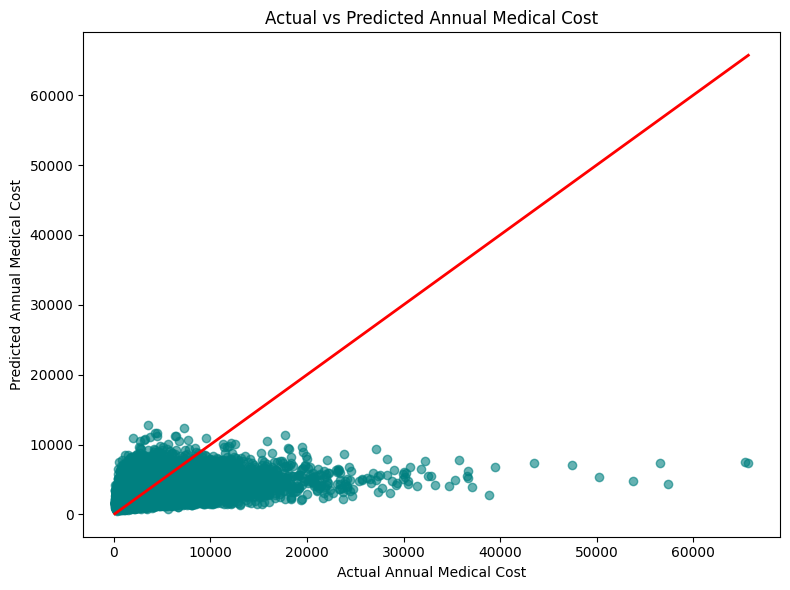

In [467]:
# Define X and y for modeling
X = features_encoded
y = df[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R2 Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

# For visual inspection, plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.xlabel('Actual Annual Medical Cost')
plt.ylabel('Predicted Annual Medical Cost')
plt.title('Actual vs Predicted Annual Medical Cost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.tight_layout()
plt.show()

In [468]:
features_encoded.head(10)

,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,dependents,...,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure,age_group,lifestyle_risk_score,is_high_bp,health_risk_index,healthcare_visit_frequency,medication_load
0,52,0,2,1,22700,1,1,1,3,1,...,0,1,0,0,2,0,0,0,6,1.609438
1,79,0,2,2,12800,4,1,0,3,1,...,0,1,1,0,1,0,0,0,4,1.386294
2,68,1,2,0,40700,2,1,1,5,3,...,1,0,1,0,1,1,1,2,5,1.609438
3,15,1,2,1,15600,5,1,2,5,3,...,1,0,0,0,4,1,0,3,2,0.693147
4,53,1,0,1,89600,1,1,2,2,0,...,1,0,1,0,2,1,0,2,7,1.098612
5,63,0,2,0,305000,2,2,0,3,2,...,0,1,1,0,3,0,1,1,2,1.098612
6,36,1,4,0,38900,3,2,0,1,0,...,0,1,0,0,0,0,0,0,3,0.000000
7,21,0,3,1,83700,2,2,0,3,2,...,0,1,0,1,4,1,0,3,7,0.693147
8,53,1,2,1,60700,4,0,1,1,0,...,0,1,1,0,2,0,0,0,2,0.000000
9,28,1,3,2,23600,0,1,0,4,2,...,0,0,0,0,0,1,0,1,2,0.000000


# Performance Measurement

In [469]:
# Function to calculate all metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# Calculate metrics for all models
performance_summary = []

for name in models.keys():
    print(f"\n{'='*60}")
    print(f"{name}")
    print(f"{'='*60}")

    # Training metrics
    train_metrics = calculate_metrics(y_train, results[name]['y_pred_train'])
    print("\nTraining Set Performance:")
    for metric, value in train_metrics.items():
        print(f"  {metric}: {value:,.4f}")

    # Test metrics
    test_metrics = calculate_metrics(y_test, results[name]['y_pred_test'])
    print("\nTest Set Performance:")
    for metric, value in test_metrics.items():
        print(f"  {metric}: {value:,.4f}")

    # Calculate overfitting indicator
    overfit_score = train_metrics['R2'] - test_metrics['R2']
    print(f"\nOverfitting Indicator (Train R2 - Test R2): {overfit_score:.4f}")

    # Store for comparison
    performance_summary.append({
        'Model': name,
        'Train_MAE': train_metrics['MAE'],
        'Test_MAE': test_metrics['MAE'],
        'Train_MSE': train_metrics['MSE'],
        'Test_MSE': test_metrics['MSE'],
        'Train_RMSE': train_metrics['RMSE'],
        'Test_RMSE': test_metrics['RMSE'],
        'Train_R2': train_metrics['R2'],
        'Test_R2': test_metrics['R2'],
        'Overfitting': overfit_score
    })

# Create performance comparison DataFrame
perf_df = pd.DataFrame(performance_summary)
print("\n" + "="*60)
print("PERFORMANCE COMPARISON SUMMARY")
print("="*60)
print(perf_df.to_string(index=False))


Linear Regression


ValueError: Found input variables with inconsistent numbers of samples: [69884, 79868]

# MAE, RMSE, R-Squared, MSE

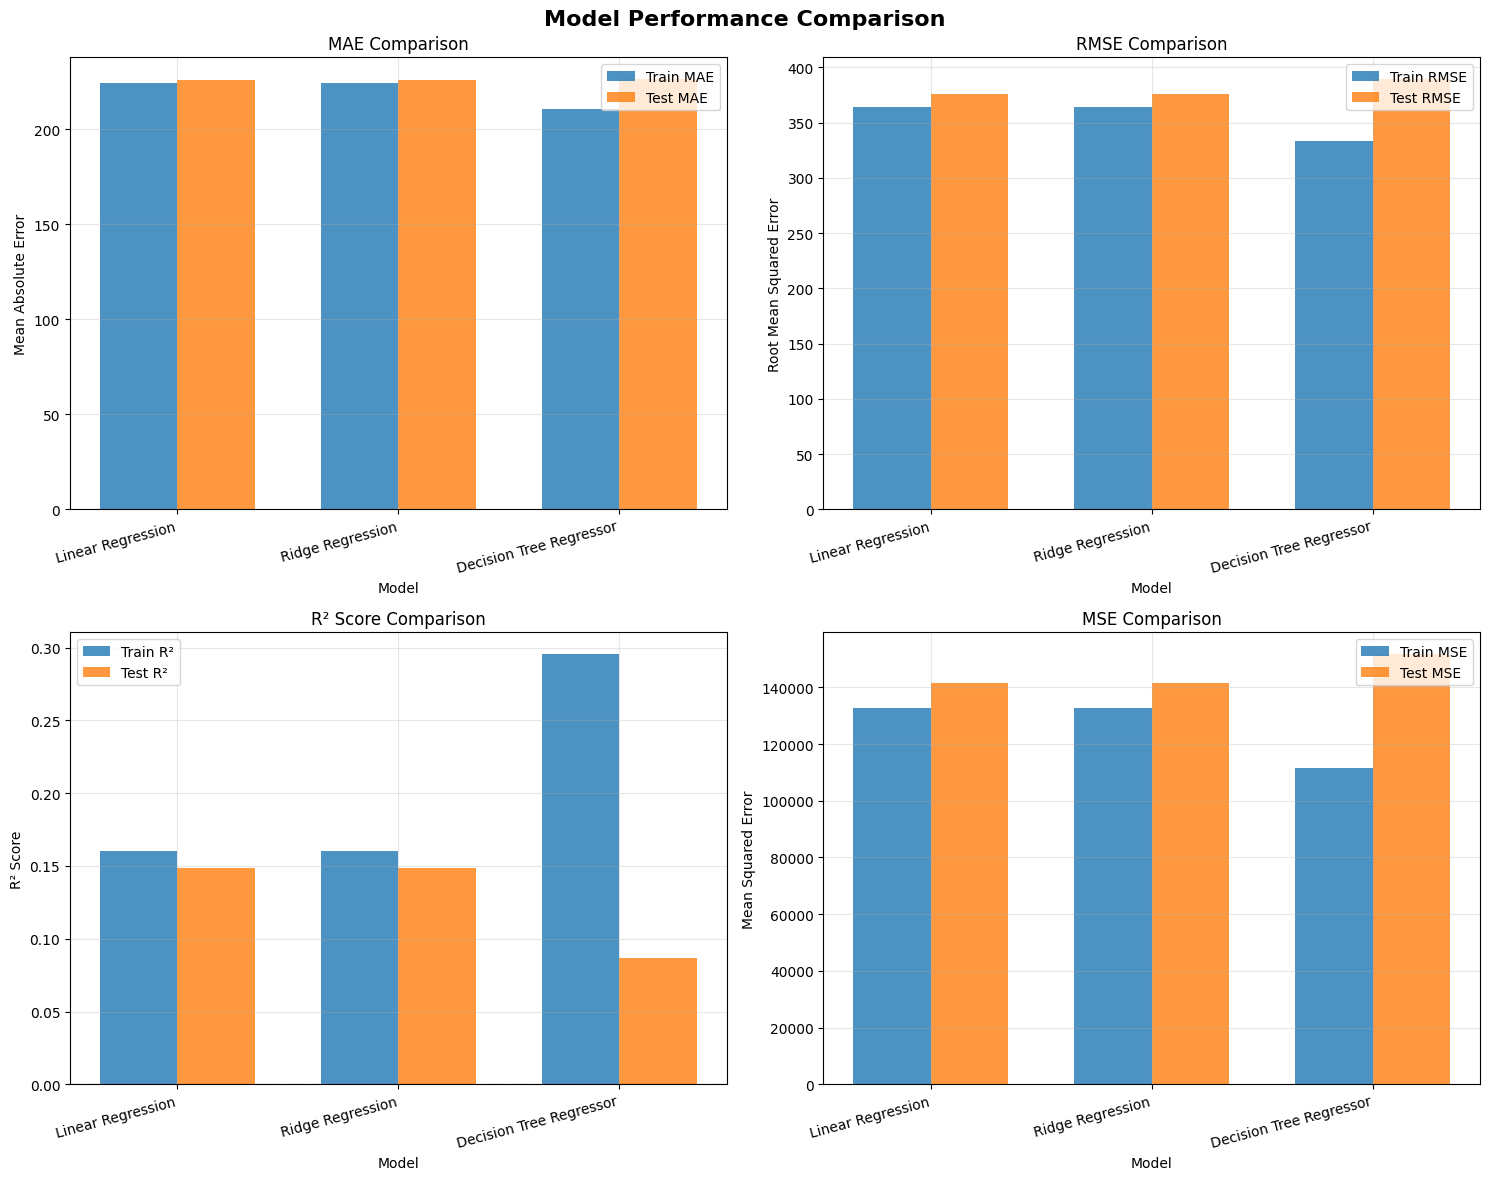

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

x_pos = np.arange(len(perf_df))
width = 0.35

# Plot 1: MAE Comparison (Lower is Better)
ax1 = axes[0, 0]
ax1.bar(x_pos - width/2, perf_df['Train_MAE'], width, label='Train MAE', alpha=0.8)
ax1.bar(x_pos + width/2, perf_df['Test_MAE'], width, label='Test MAE', alpha=0.8)
ax1.set_xlabel('Model')
ax1.set_ylabel('Mean Absolute Error')
ax1.set_title('MAE Comparison')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(perf_df['Model'], rotation=15, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: RMSE Comparison (Lower is Better)
ax2 = axes[0, 1]
ax2.bar(x_pos - width/2, perf_df['Train_RMSE'], width, label='Train RMSE', alpha=0.8)
ax2.bar(x_pos + width/2, perf_df['Test_RMSE'], width, label='Test RMSE', alpha=0.8)
ax2.set_xlabel('Model')
ax2.set_ylabel('Root Mean Squared Error')
ax2.set_title('RMSE Comparison')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(perf_df['Model'], rotation=15, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: R² Score Comparison (Higher is Better)
ax3 = axes[1, 0]
ax3.bar(x_pos - width/2, perf_df['Train_R2'], width, label='Train R²', alpha=0.8)
ax3.bar(x_pos + width/2, perf_df['Test_R2'], width, label='Test R²', alpha=0.8)
ax3.set_xlabel('Model')
ax3.set_ylabel('R² Score')
ax3.set_title('R² Score Comparison')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(perf_df['Model'], rotation=15, ha='right')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.axhline(y=0, color='r', linestyle='--', linewidth=0.8)

# Plot 4: MSE Comparison (Lower is Better)
ax4 = axes[1, 1]
ax4.bar(x_pos - width/2, perf_df['Train_MSE'], width, label='Train MSE', alpha=0.8)
ax4.bar(x_pos + width/2, perf_df['Test_MSE'], width, label='Test MSE', alpha=0.8)
ax4.set_xlabel('Model')
ax4.set_ylabel('Mean Squared Error')
ax4.set_title('MSE Comparison')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(perf_df['Model'], rotation=15, ha='right')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Overfitting Analysis

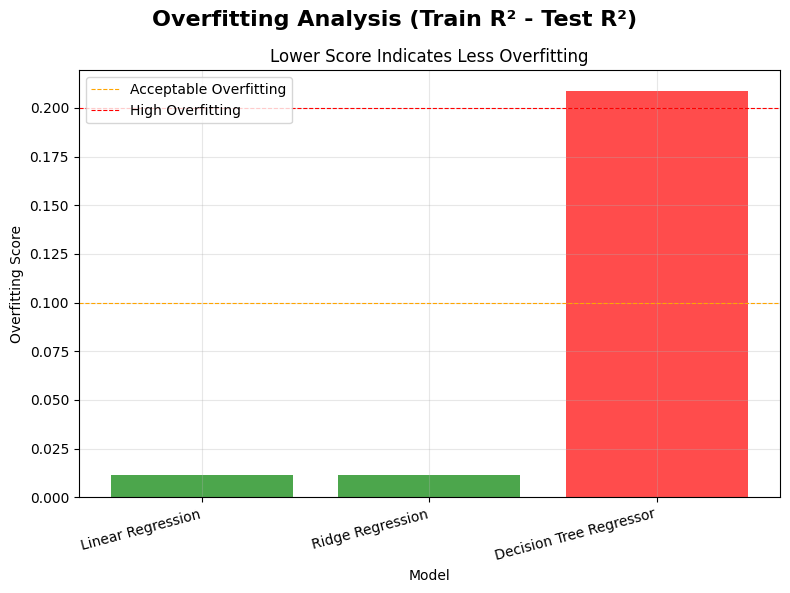

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle('Overfitting Analysis (Train R² - Test R²)', fontsize=16, fontweight='bold')

x_pos = np.arange(len(perf_df))
colors = ['green' if x < 0.1 else 'orange' if x < 0.2 else 'red' for x in perf_df['Overfitting']]
ax.bar(x_pos, perf_df['Overfitting'], color=colors, alpha=0.7)
ax.set_xlabel('Model')
ax.set_ylabel('Overfitting Score')
ax.set_title('Lower Score Indicates Less Overfitting')
ax.set_xticks(x_pos)
ax.set_xticklabels(perf_df['Model'], rotation=15, ha='right')
ax.axhline(y=0.1, color='orange', linestyle='--', linewidth=0.8, label='Acceptable Overfitting')
ax.axhline(y=0.2, color='red', linestyle='--', linewidth=0.8, label='High Overfitting')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_overfitting_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Predicted vs Actual Values

KeyboardInterrupt: 

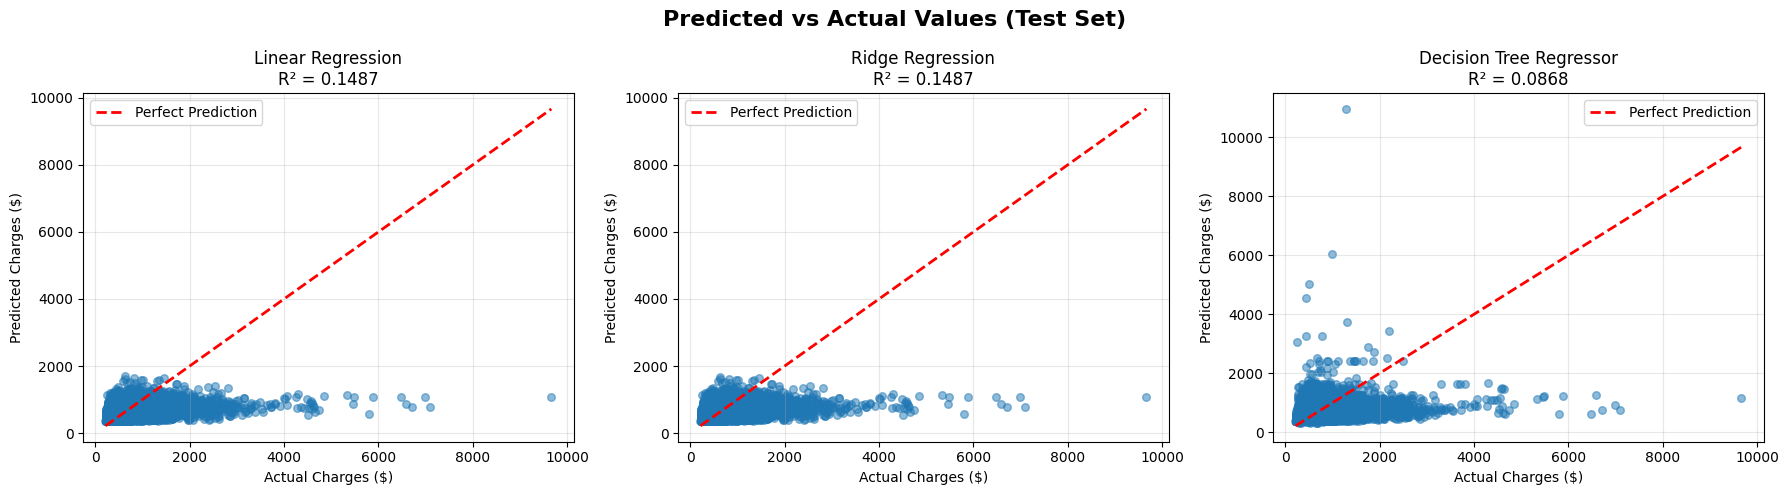

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Predicted vs Actual Values (Test Set)', fontsize=16, fontweight='bold')

for idx, (name, ax) in enumerate(zip(models.keys(), axes.flat)):
    y_pred = results[name]['y_pred_test']

    ax.scatter(y_test, y_pred, alpha=0.5, s=30)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
            'r--', lw=2, label='Perfect Prediction')
    ax.set_xlabel('Actual Charges ($)')
    ax.set_ylabel('Predicted Charges ($)')
    ax.set_title(f'{name}\nR² = {perf_df.iloc[idx]["Test_R2"]:.4f}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('predicted_vs_actual.png', dpi=300, bbox_inches='tight')
plt.show()

# Residual Analysis

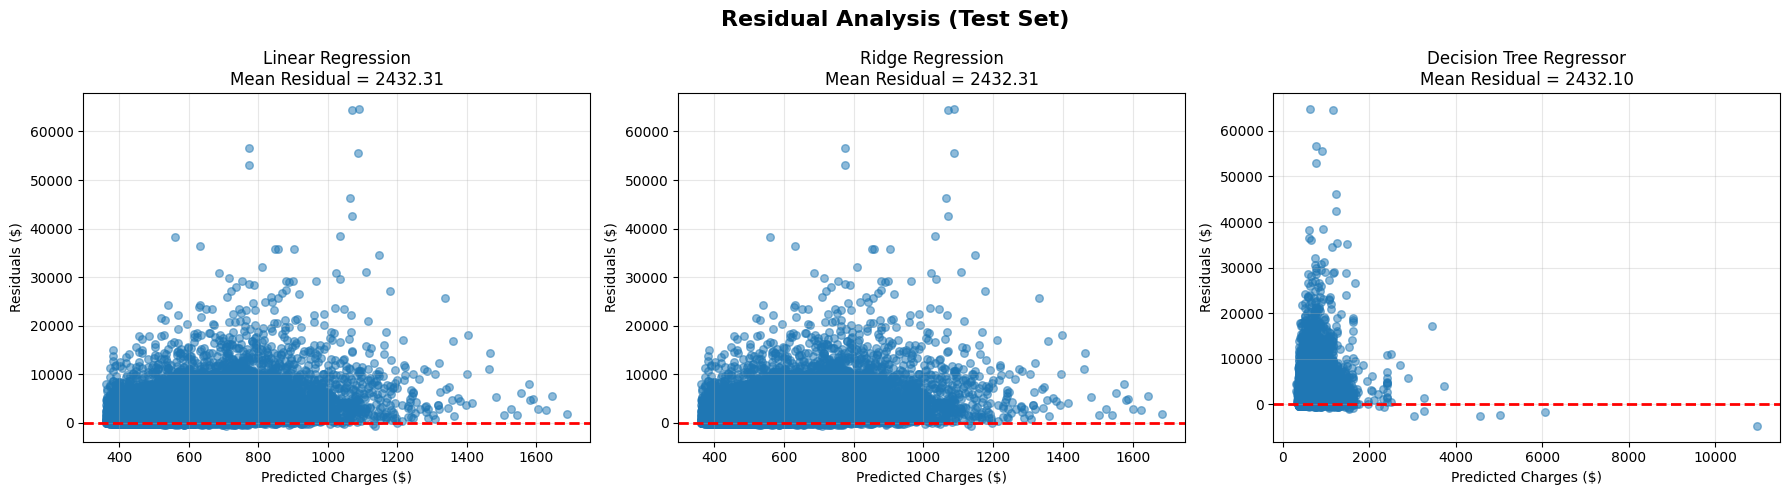

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Residual Analysis (Test Set)', fontsize=16, fontweight='bold')

for idx, (name, ax) in enumerate(zip(models.keys(), axes.flat)):
    y_pred = results[name]['y_pred_test']
    residuals = y_test - y_pred

    ax.scatter(y_pred, residuals, alpha=0.5, s=30)
    ax.axhline(y=0, color='r', linestyle='--', lw=2)
    ax.set_xlabel('Predicted Charges ($)')
    ax.set_ylabel('Residuals ($)')
    ax.set_title(f'{name}\nMean Residual = {residuals.mean():.2f}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('residual_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Bias Variance Analysis


BIAS-VARIANCE ANALYSIS - LEARNING CURVES

Generating learning curve for Linear Regression...

Generating learning curve for Ridge Regression...

Generating learning curve for Decision Tree Regressor...


KeyboardInterrupt: 

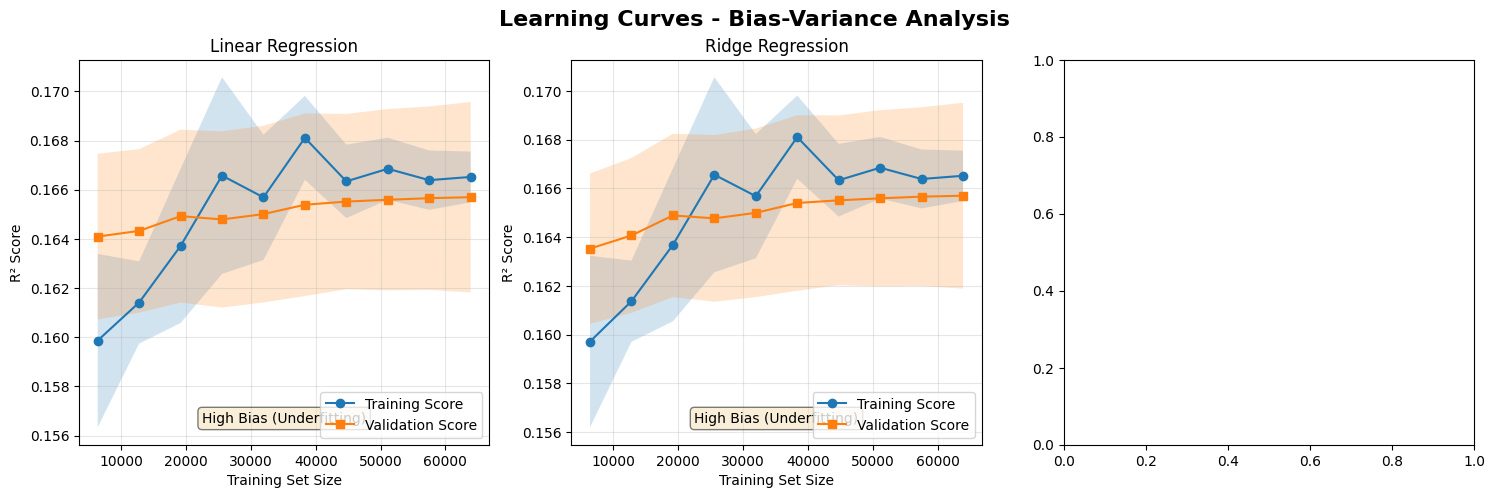

In [ ]:
print("\n" + "="*60)
print("BIAS-VARIANCE ANALYSIS - LEARNING CURVES")
print("="*60)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Learning Curves - Bias-Variance Analysis', fontsize=16, fontweight='bold')

train_sizes = np.linspace(0.1, 1.0, 10)

for idx, (name, ax) in enumerate(zip(models.keys(), axes.flat)):
    print(f"\nGenerating learning curve for {name}...")

    model = models[name]

    if name == 'Decision Tree Regressor':
        X_data = X_train
    else:
        X_data = X_train_scaled

    train_sizes_abs, train_scores, val_scores = learning_curve(
        model, X_data, y_train,
        train_sizes=train_sizes,
        cv=5,
        scoring='r2',
        n_jobs=-1,
        random_state=42
    )

    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    val_mean = val_scores.mean(axis=1)
    val_std = val_scores.std(axis=1)

    ax.plot(train_sizes_abs, train_mean, label='Training Score', marker='o')
    ax.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.2)

    ax.plot(train_sizes_abs, val_mean, label='Validation Score', marker='s')
    ax.fill_between(train_sizes_abs, val_mean - val_std, val_mean + val_std, alpha=0.2)

    ax.set_xlabel('Training Set Size')
    ax.set_ylabel('R² Score')
    ax.set_title(f'{name}')
    ax.legend(loc='lower right')
    ax.grid(True, alpha=0.3)

    # Interpret bias-variance
    final_gap = train_mean[-1] - val_mean[-1]
    if final_gap > 0.15:
        interpretation = "High Variance (Overfitting)"
    elif val_mean[-1] < 0.6:
        interpretation = "High Bias (Underfitting)"
    else:
        interpretation = "Good Balance"

    ax.text(0.5, 0.05, interpretation, transform=ax.transAxes,
            ha='center', va='bottom', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('learning_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# SUMMARY

In [ ]:
print("\n" + "="*60)
print("FINAL SUMMARY AND RECOMMENDATIONS")
print("="*60)

best_model_idx = perf_df['Test_R2'].idxmax()
best_model_name = perf_df.loc[best_model_idx, 'Model']
best_r2 = perf_df.loc[best_model_idx, 'Test_R2']
best_rmse = perf_df.loc[best_model_idx, 'Test_RMSE']

print(f"\n🏆 BEST PERFORMING MODEL: {best_model_name}")
print(f"   - Test R-squared Score: {best_r2:.4f}")
print(f"   - Test RMSE: ${best_rmse:,.2f}")
print(f"   - Overfitting Score: {perf_df.loc[best_model_idx, 'Overfitting']:.4f}")

print("\n📊 MODEL RANKINGS (by Test R-squared):")
ranked = perf_df.sort_values('Test_R2', ascending=False)
for i, row in enumerate(ranked.itertuples(), 1):
    print(f"   {i}. {row.Model}: R-squared = {row.Test_R2:.4f}, RMSE = ${row.Test_RMSE:,.2f}")



FINAL SUMMARY AND RECOMMENDATIONS

🏆 BEST PERFORMING MODEL: Ridge Regression
   - Test R-squared Score: 0.1487
   - Test RMSE: $376.19
   - Overfitting Score: 0.0114

📊 MODEL RANKINGS (by Test R-squared):
   1. Ridge Regression: R-squared = 0.1487, RMSE = $376.19
   2. Linear Regression: R-squared = 0.1487, RMSE = $376.19
   3. Decision Tree Regressor: R-squared = 0.0868, RMSE = $389.61
